In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from raw.drafts.portfolio_optimization import PortfolioOptimization

In [3]:
import numpy as np
import pandas as pd
# from pandas_datareader import data

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from copy import deepcopy

import pandas_datareader as pdr

In [11]:
stocks = np.array(
    ['GAZP', 'GEMC', 'YNDX', 'VKCO', 'POSI', 'FLOT', 'UNAC', 'NMTP', 'FESH', 'PIKK', 'AFLT',
     'DSKY', 'MVID', 'MGNT', 'OZON', 'POLY', 'ALRS', 'NLMK', 'PHOR', 'MTSS', 'SBER', 'TCSG', 
     'IRAO', 'NVTK', 'ROSN', 'FIVE', 'GMKN', 'LKOH', 'PLZL', 'SNGS', 'TATN']
)
stocks.astype(str)

mask = np.argwhere(
    np.isin(
        stocks, ['GEMC', 'VKCO', 'POSI', 'FLOT', 'TCSG', 'OZON']
    )
)

stocks = np.delete(stocks, mask)
stocks

array(['GAZP', 'YNDX', 'UNAC', 'NMTP', 'FESH', 'PIKK', 'AFLT', 'DSKY',
       'MVID', 'MGNT', 'POLY', 'ALRS', 'NLMK', 'PHOR', 'MTSS', 'SBER',
       'IRAO', 'NVTK', 'ROSN', 'FIVE', 'GMKN', 'LKOH', 'PLZL', 'SNGS',
       'TATN'], dtype='<U4')

In [12]:
portOpt = PortfolioOptimization(stocks)

In [14]:
import warnings
warnings.filterwarnings('ignore')

portOpt.make_stock_table('31-10-2018', '31-10-2023')
print(portOpt.df_assets)
print()
print(portOpt.df_benchmark)

              GAZP    YNDX    UNAC    NMTP    FESH   PIKK    AFLT   DSKY  \
TRADEDATE                                                                  
2018-10-31  155.47  1916.5  0.8090   6.135   4.990  352.3   97.25  89.50   
2018-11-01  153.50  1999.0  0.8230   6.150   5.055  353.7   96.88  90.38   
2018-11-02  153.71  1995.0  0.8270   6.185   5.110  353.2  101.78  90.76   
2018-11-06  156.00  2002.0  0.8480   6.315   5.125  353.4  102.40  90.50   
2018-11-07  157.85  1995.0  0.8550   6.525   5.090  351.2  100.60  90.30   
...            ...     ...     ...     ...     ...    ...     ...    ...   
2023-10-25  169.62  2737.0  1.8785  12.895  95.680  751.0   40.87  71.42   
2023-10-26  168.45  2682.4  1.8080  12.640  93.710  742.4   39.98  71.42   
2023-10-27  167.26  2666.6  1.8085  12.620  93.140  730.9   40.26  71.42   
2023-10-30  167.16  2603.6  1.7900  12.630  93.260  722.0   39.89  71.42   
2023-10-31  167.88  2612.0  1.7530  12.410  90.480  707.5   39.35  71.40   

           

In [15]:
portOpt.df_assets.to_csv('df_assets1.csv', sep=',')
portOpt.df_assets.to_csv('df_assets2.csv', sep=';')

portOpt.df_benchmark.to_csv('df_benchmark1.csv', sep=',')
portOpt.df_benchmark.to_csv('df_benchmark2.csv', sep=';')

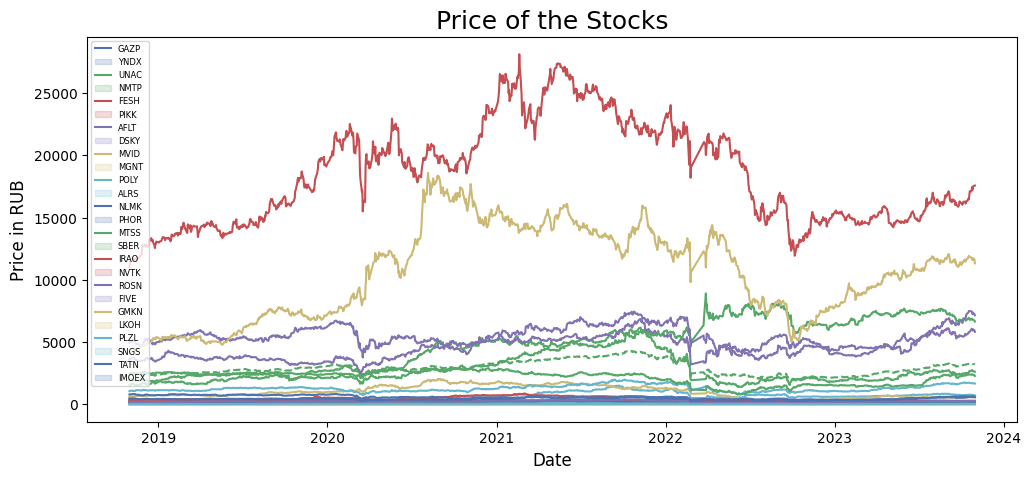

In [18]:
portOpt.plot_stock_performance()

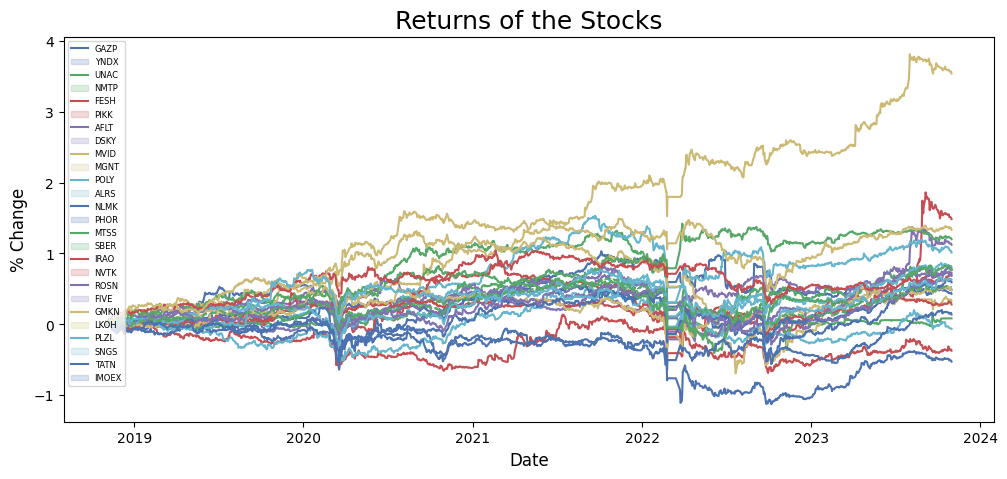

In [19]:
portOpt.plot_stock_return_performance()

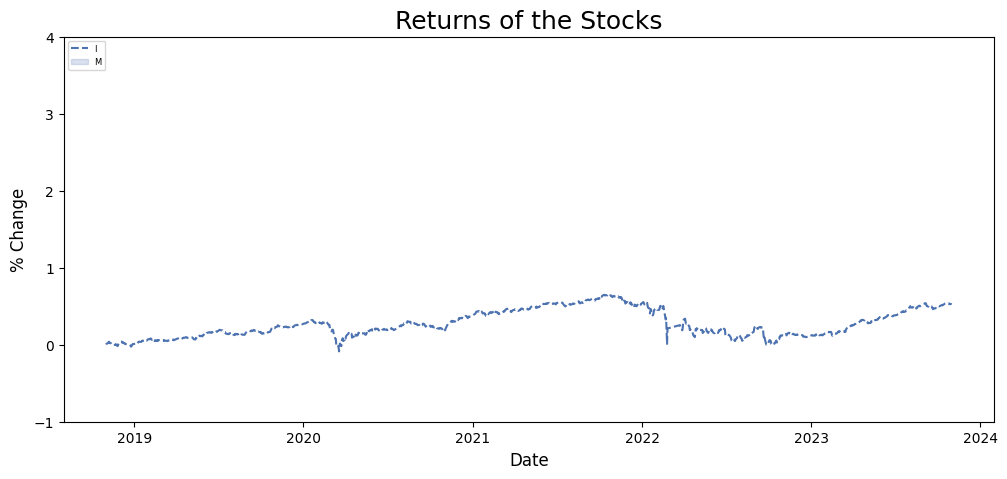

In [21]:
benchmark_returns = portOpt.df_benchmark.pct_change()[1:].cumsum()

plt.figure(figsize=(12, 5))
sns.lineplot(data=benchmark_returns[portOpt.benchmark], label=portOpt.benchmark, linestyle='--')
plt.title('Returns of the Stocks', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('% Change', fontsize=12)
plt.ylim((-1, 4))
plt.legend(portOpt.benchmark, loc='upper left', prop={'size': 6})
plt.show();

## Построение портфеля

### Предпосылки

1. Не имеем доступа к зарубежным рынкам (по крайней мере в краткосрочной перспективе)
   
   - минимизируем политические риски заморозки активов
   - семья не имеет финансового образования и опыта в торговле на финансовых рынках, поэтому торговля на зарубежных рынках сопряжена и с бОльшими финансовыми рисками

<br>

2. Инвестируем в следующие классы активов: акции, облигации, депозиты, commodities?
   
   - деривативы являются более рисковым финансовым инструментом по сравнению с "более классическими" активами и в основном используются при построении стратегий ??
   - в семье нет квалифицированных инвесторов (если мы только рекомендуем активы, то ок; если же мы занимаемся доверительным управлением, то лажа)
   - насколько я понимаю, торговля commodities доступна только через фьючерсы, а этот фин. инструмент не доступен не квалифицированным инвесторам (или людям, прошедшим тест на знание соответствующих фин. инструментов)

<br>

3. Соотношение активов в портфеле: ? / ? / ? (...)
   
   - ...
   - ...

<br>

4. ERP = ...
5. Какой берем RFR?

### Подбор оптимальных весов

In [23]:
portOpt.calc_stock_returns()
print(portOpt.df_assets_performance)
print()
print(portOpt.df_benchmark_performance)

                GAZP      YNDX      UNAC      NMTP      FESH      PIKK  \
TRADEDATE                                                                
2018-11-01 -0.012671  0.043047  0.017305  0.002445  0.013026  0.003974   
2018-11-02  0.001368 -0.002001  0.004860  0.005691  0.010880 -0.001414   
2018-11-06  0.014898  0.003509  0.025393  0.021019  0.002935  0.000566   
2018-11-07  0.011859 -0.003497  0.008255  0.033254 -0.006829 -0.006225   
2018-11-08 -0.002154 -0.006516 -0.019883  0.016858 -0.001965  0.007403   
...              ...       ...       ...       ...       ...       ...   
2023-10-25 -0.003349  0.004330  0.008861 -0.008077  0.002515 -0.010801   
2023-10-26 -0.006898 -0.019949 -0.037530 -0.019775 -0.020589 -0.011451   
2023-10-27 -0.007064 -0.005890  0.000277 -0.001582 -0.006083 -0.015490   
2023-10-30 -0.000598 -0.023626 -0.010229  0.000792  0.001288 -0.012177   
2023-10-31  0.004307  0.003226 -0.020670 -0.017419 -0.029809 -0.020083   

                AFLT      DSKY      M

In [ ]:
portOpt.calc_betas()

In [70]:
portOpt.check_beta_sustainability()

,daily_beta,monthly_1_beta,monthly_last_beta,monthly_avg_beta,monthly_cumulative_beta
GAZP,1.0148,0.9286,0.8468,0.8455,0.9981
YNDX,0.8809,0.6593,0.2174,1.2367,1.3227
UNAC,0.8835,0.5189,0.7957,1.8732,1.2356
NMTP,0.7592,0.6542,0.3736,1.1851,1.1250
FESH,0.8725,0.5959,0.2484,1.2286,1.1111
PIKK,0.5460,0.8334,0.2650,1.1602,1.1324
AFLT,0.8031,0.4735,0.1927,1.1768,1.3881
DSKY,0.6107,0.5736,0.1629,0.6828,0.8465
MVID,0.7364,0.8790,0.1999,0.8729,1.0795
MGNT,0.7242,0.5387,0.2325,1.2221,1.0738


In [71]:
portOpt.df_all_betas.describe()

,daily_beta,monthly_1_beta,monthly_last_beta,monthly_avg_beta,monthly_cumulative_beta
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.781104,0.712200,0.304564,1.073308,1.063148
std,0.192046,0.247517,0.178666,0.324674,0.258212
min,0.292600,0.130600,0.086100,0.419600,0.637600
25%,0.645600,0.538700,0.199900,0.845500,0.846500
50%,0.759200,0.724200,0.258100,1.121400,1.111100
75%,0.917600,0.879000,0.371500,1.228600,1.195200
max,1.058000,1.133300,0.846800,1.873200,1.560400


In [94]:
portOpt.calc_expected_returns()

GAZP    17.41575
YNDX    19.95855
UNAC    24.09580
NMTP    19.62315
FESH    19.90590
PIKK    19.46130
AFLT    19.56920
DSKY    16.35820
MVID    17.59385
MGNT    19.86365
POLY    18.87240
ALRS    19.29230
NLMK    14.64740
PHOR    20.24455
MTSS    16.79630
SBER    20.26535
IRAO    16.51810
NVTK    20.51690
ROSN    23.18515
FIVE    19.20910
GMKN    15.85510
LKOH    18.87370
PLZL    17.33320
SNGS    18.40115
TATN    18.55650
Name: monthly_avg_beta, dtype: float64

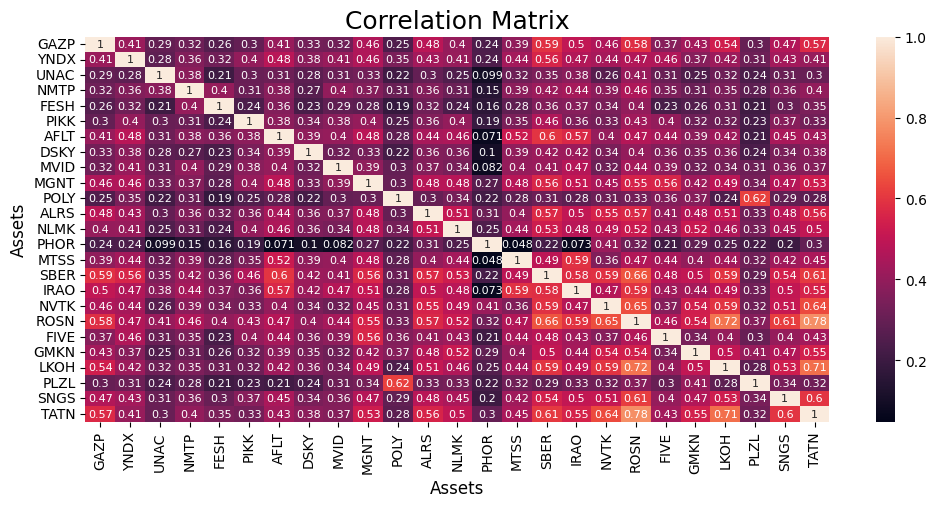

In [95]:
portOpt.make_corr_mat()

In [96]:
portOpt.calc_cov_matrix()

In [97]:
portOpt.calc_opt_stock_weights()

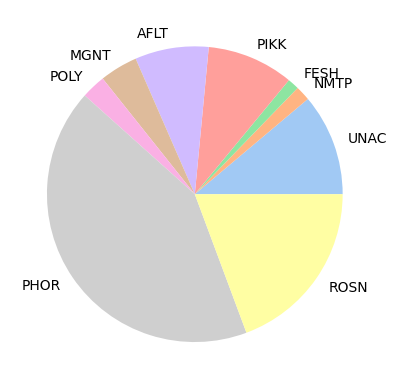

In [98]:
portOpt.make_pie_graph_weights()

In [99]:
portOpt.cleaned_opt_stock_weights

{'UNAC': 0.11139,
 'NMTP': 0.01623,
 'FESH': 0.01255,
 'PIKK': 0.09474,
 'AFLT': 0.08059,
 'MGNT': 0.04158,
 'POLY': 0.02657,
 'PHOR': 0.42314,
 'ROSN': 0.1932}

In [100]:
portOpt.calc_stock_portfolio_performance()

Expected annual return: 21.0%
Annual volatility: 23.7%
Sharpe Ratio: 0.39


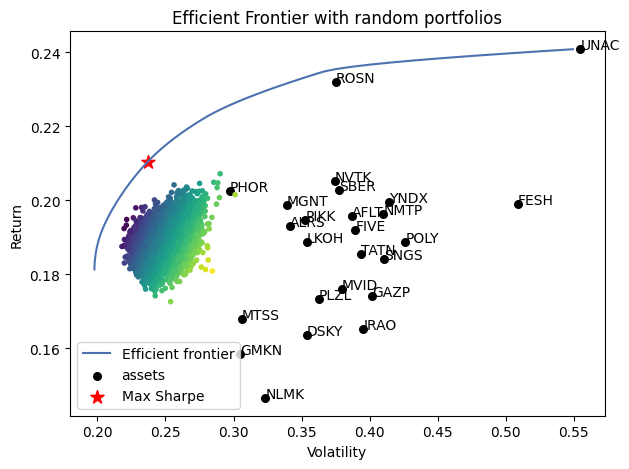

In [101]:
portOpt.plot_efficient_frontier()